#Time series: Sanaa Weather Forecasting (ARIMA)

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

import seaborn as sns # for plot visualization
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.stattools import adfuller, acf, pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# import os
# print(os.listdir("../input"))

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
from google.colab import files
uploaded = files.upload()

Saving thesis2026.csv to thesis2026.csv


In [ ]:
#weather_df = pd.read_csv('thesis2025.csv', parse_dates=['date'], index_col='date')
weather_df = pd.read_csv('thesis2026.csv', parse_dates=['date'])
weather_df.head()

,date,SR_time,max_temp,max_Ws,direction,DA_Humidity,solar_radiation,solar_radiation_1
0,2011-01-01,0.7,3.5,4.7,97,91.1,0.151308,82339.0
1,2011-01-02,0.8,0.7,7.5,94,91.2,0.148358,80733.5
2,2011-01-03,0.0,4.4,6.6,90,98.2,0.091156,49605.5
3,2011-01-04,0.0,4.3,5.1,283,95.4,0.067618,36796.5
4,2011-01-05,0.0,3.5,5.3,219,93.9,0.052459,28546.9


In [ ]:
weather_df.describe()

,SR_time,max_temp,max_Ws,direction,DA_Humidity,solar_radiation,solar_radiation_1
count,1461.000000,1461.000000,1461.000000,1461.000000,1461.000000,1461.000000,1461.000000
mean,5.826215,17.632923,6.891307,176.446270,66.978645,0.495596,269693.682546
std,4.382506,10.106121,2.029414,112.552256,14.765811,0.261960,142553.435016
min,0.000000,-8.300000,2.400000,1.000000,30.100000,0.028342,15422.900000
25%,0.800000,9.300000,5.600000,94.000000,55.400000,0.272094,148068.000000
50%,6.600000,18.100000,6.700000,207.000000,66.900000,0.474137,258015.900000
75%,9.800000,26.400000,8.000000,275.000000,78.300000,0.724701,394368.000000
max,12.700000,39.200000,17.000000,358.000000,99.000000,0.999999,544179.600000


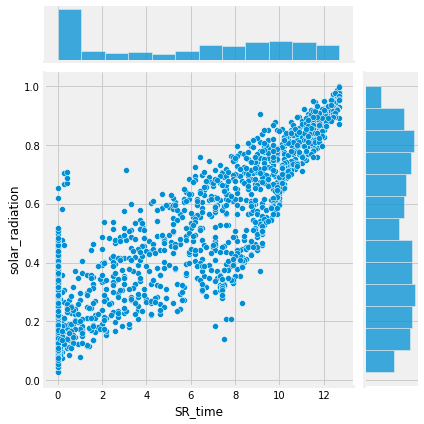

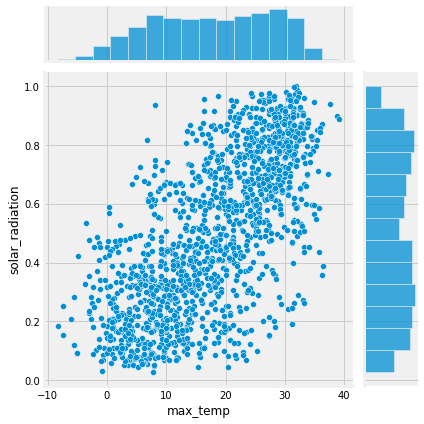

In [ ]:
sns.jointplot(x='SR_time', y='solar_radiation', data=weather_df)
sns.jointplot(x='max_temp', y='solar_radiation', data=weather_df)

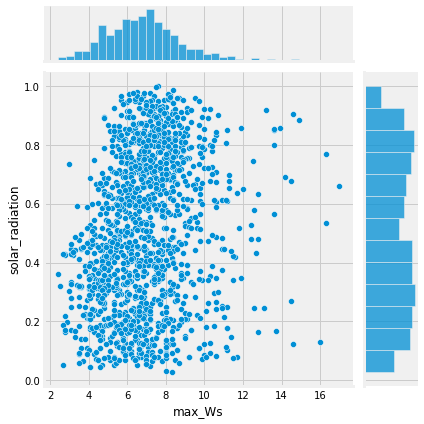

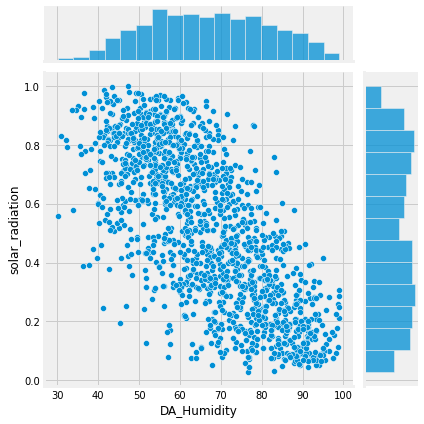

In [ ]:
sns.jointplot(x='max_Ws', y='solar_radiation', data=weather_df)
sns.jointplot(x='DA_Humidity', y='solar_radiation', data=weather_df)

In [ ]:
weather_df=weather_df.drop(['SR_time', 'max_temp', 'direction', 'DA_Humidity','max_Ws','solar_radiation_1'], axis=1)

In [ ]:
weather_df.shape[0]

1461

In [ ]:
train_size = int(weather_df.shape[0]-7)
train_size

1454

In [ ]:
train =  weather_df[0:train_size]
test =  weather_df[train_size:]

# **Persistence Model**

In [ ]:
weather_df['S']= weather_df['solar_radiation'].shift(1)
weather_df.head()

,date,solar_radiation,S
0,2011-01-01,0.151308,NaN
1,2011-01-02,0.148358,0.151308
2,2011-01-03,0.091156,0.148358
3,2011-01-04,0.067618,0.091156
4,2011-01-05,0.052459,0.067618


In [ ]:
train, test = weather_df[1:train_size], weather_df[train_size:]

In [ ]:
train_X, train_y = train['S'], train['solar_radiation']
test_X, test_y = test['S'], test['solar_radiation']

# **walk-forward validation**

In [ ]:
predictions = test_X.copy()

print(predictions)
print(test_y)

1454    0.067817
1455    0.136570
1456    0.345737
1457    0.279043
1458    0.109408
1459    0.183386
1460    0.079028
Name: S, dtype: float64
1454    0.136570
1455    0.345737
1456    0.279043
1457    0.109408
1458    0.183386
1459    0.079028
1460    0.075050
Name: solar_radiation, dtype: float64


In [ ]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(test_y, predictions)
mse

0.014011601901885736

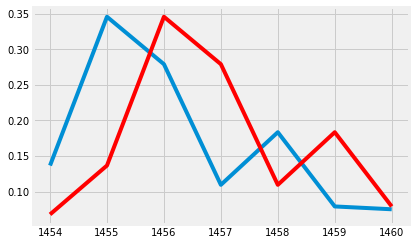

In [ ]:
from matplotlib import pyplot
pyplot.plot(test_y)
pyplot.plot(predictions, color='red')

# **Autoregression Model**

In [ ]:
weather_df = pd.read_csv('thesis2026.csv', header=0 , parse_dates=[0])
weather_df.head()

,date,SR_time,max_temp,max_Ws,direction,DA_Humidity,solar_radiation,solar_radiation_1
0,2011-01-01,0.7,3.5,4.7,97,91.1,0.151308,82339.0
1,2011-01-02,0.8,0.7,7.5,94,91.2,0.148358,80733.5
2,2011-01-03,0.0,4.4,6.6,90,98.2,0.091156,49605.5
3,2011-01-04,0.0,4.3,5.1,283,95.4,0.067618,36796.5
4,2011-01-05,0.0,3.5,5.3,219,93.9,0.052459,28546.9


In [ ]:
weather_df=weather_df.drop(['SR_time', 'max_temp', 'direction', 'DA_Humidity','max_Ws','date','solar_radiation_1'], axis=1)
weather_df.shape[0]
train_size = int(weather_df.shape[0]-7)
train =  weather_df[0:train_size]
test =  weather_df[train_size:]
train.head()

,solar_radiation
0,0.151308
1,0.148358
2,0.091156
3,0.067618
4,0.052459


In [ ]:
from statsmodels.tsa.ar_model import AR

In [ ]:
model = AR(train)
model_fit = model.fit()

# **No. of lag Variables**

In [ ]:
model_fit.k_ar

23

# **Coef of lag variables**

In [ ]:
model_fit.params

const                  0.015964
L1.solar_radiation     0.464303
L2.solar_radiation    -0.004251
L3.solar_radiation     0.123004
L4.solar_radiation     0.034159
L5.solar_radiation     0.078708
L6.solar_radiation     0.032034
L7.solar_radiation     0.030682
L8.solar_radiation     0.044024
L9.solar_radiation     0.006753
L10.solar_radiation    0.033398
L11.solar_radiation   -0.021990
L12.solar_radiation    0.057545
L13.solar_radiation    0.034404
L14.solar_radiation    0.045334
L15.solar_radiation   -0.034237
L16.solar_radiation   -0.004731
L17.solar_radiation    0.049813
L18.solar_radiation   -0.038060
L19.solar_radiation    0.018766
L20.solar_radiation    0.009969
L21.solar_radiation   -0.029880
L22.solar_radiation    0.045815
L23.solar_radiation   -0.007627
dtype: float64

In [ ]:
predictions = model_fit.predict(start=len(train), end=len(train)+len(test)-1)
predictions

1454    0.131079
1455    0.164978
1456    0.161348
1457    0.153558
1458    0.164058
1459    0.173980
1460    0.192263
dtype: float64

In [ ]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(test_y, predictions)
mse

0.010233352714836219

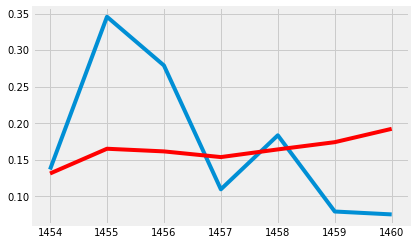

In [ ]:
pyplot.plot(test_y)
pyplot.plot(predictions, color='red')

# **Walk Forward**

In [ ]:
weather_df = pd.read_csv('thesis2026.csv', header=0 , parse_dates=[0])
weather_df.head()

,date,SR_time,max_temp,max_Ws,direction,DA_Humidity,solar_radiation,solar_radiation_1
0,2011-01-01,0.7,3.5,4.7,97,91.1,0.151308,82339.0
1,2011-01-02,0.8,0.7,7.5,94,91.2,0.148358,80733.5
2,2011-01-03,0.0,4.4,6.6,90,98.2,0.091156,49605.5
3,2011-01-04,0.0,4.3,5.1,283,95.4,0.067618,36796.5
4,2011-01-05,0.0,3.5,5.3,219,93.9,0.052459,28546.9


In [ ]:
weather_df=weather_df.drop(['SR_time', 'max_temp', 'direction', 'DA_Humidity','max_Ws','date','solar_radiation_1'], axis=1)
weather_df.shape[0]
train_size = int(weather_df.shape[0]-7)
train =  weather_df[0:train_size]
test =  weather_df[train_size:]
train.head()

,solar_radiation
0,0.151308
1,0.148358
2,0.091156
3,0.067618
4,0.052459


In [ ]:
test

,solar_radiation
1454,0.136570
1455,0.345737
1456,0.279043
1457,0.109408
1458,0.183386
1459,0.079028
1460,0.075050


In [ ]:
train

,solar_radiation
0,0.151308
1,0.148358
2,0.091156
3,0.067618
4,0.052459
...,...
1449,0.160531
1450,0.101774
1451,0.141812
1452,0.123883


In [ ]:
data = train
predict =[]
for i in test:
  model= AR(data)
  model_fit=model.fit()
  y=model_fit.predict(start=len(data), end=len(train)+len(test)-1)
  print(y.values)
  predict.append(y.values)
  data= np.append(data, i)
  data= pd.Series(data)

[0.13107854 0.16497829 0.16134819 0.15355784 0.16405825 0.17398012
 0.19226316]


In [ ]:
predict

[array([0.13107854, 0.16497829, 0.16134819, 0.15355784, 0.16405825,
        0.17398012, 0.19226316])]

In [ ]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(test.values, y.values)
mse

0.010233352714836219

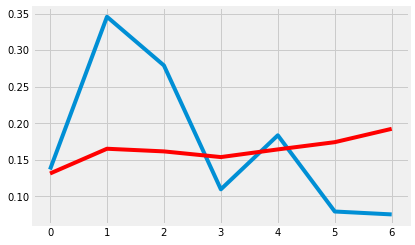

In [ ]:
pyplot.plot(test.values)
pyplot.plot(y.values, color='red')

# **Moving Average Model**

In [ ]:
weather_df = pd.read_csv('thesis2026.csv', header=0 , parse_dates=[0])
weather_df.head()

,date,SR_time,max_temp,max_Ws,direction,DA_Humidity,solar_radiation,solar_radiation_1
0,2011-01-01,0.7,3.5,4.7,97,91.1,0.151308,82339.0
1,2011-01-02,0.8,0.7,7.5,94,91.2,0.148358,80733.5
2,2011-01-03,0.0,4.4,6.6,90,98.2,0.091156,49605.5
3,2011-01-04,0.0,4.3,5.1,283,95.4,0.067618,36796.5
4,2011-01-05,0.0,3.5,5.3,219,93.9,0.052459,28546.9


In [ ]:
weather_df=weather_df.drop(['SR_time', 'max_temp', 'direction', 'DA_Humidity','max_Ws','date','solar_radiation_1'], axis=1)
weather_df['S'] =  weather_df['solar_radiation'].shift(1)
weather_df['Resid'] = weather_df['solar_radiation'] - weather_df['S']
weather_df.head()

,solar_radiation,S,Resid
0,0.151308,NaN,NaN
1,0.148358,0.151308,-0.002950
2,0.091156,0.148358,-0.057202
3,0.067618,0.091156,-0.023538
4,0.052459,0.067618,-0.015160


In [ ]:
train, test = weather_df.Resid[1:weather_df.shape[0]-7], weather_df.Resid[weather_df.shape[0]-7:]

In [ ]:
train.head()

1   -0.002950
2   -0.057202
3   -0.023538
4   -0.015160
5   -0.001717
Name: Resid, dtype: float64

In [ ]:
from statsmodels.tsa.ar_model import AR
model = AR(train)
model_fit = model.fit()

In [ ]:
model_fit.k_ar

23

In [ ]:
model_fit.params

const       -0.000250
L1.Resid    -0.532859
L2.Resid    -0.535540
L3.Resid    -0.409972
L4.Resid    -0.374434
L5.Resid    -0.295564
L6.Resid    -0.261807
L7.Resid    -0.231082
L8.Resid    -0.186193
L9.Resid    -0.178384
L10.Resid   -0.145227
L11.Resid   -0.167253
L12.Resid   -0.110476
L13.Resid   -0.073691
L14.Resid   -0.028500
L15.Resid   -0.062326
L16.Resid   -0.068700
L17.Resid   -0.018194
L18.Resid   -0.055658
L19.Resid   -0.037292
L20.Resid   -0.026635
L21.Resid   -0.057900
L22.Resid   -0.010251
L23.Resid   -0.027875
dtype: float64

In [ ]:
pred_resid = model_fit.predict(start=len(train), end=len(train)+len(test)-1)
pred_resid

1454    0.049370
1455    0.034999
1456   -0.006235
1457   -0.011764
1458    0.008342
1459    0.009032
1460    0.018624
dtype: float64

In [ ]:
predictions = weather_df.S[weather_df.shape[0]-7:] + pred_resid
predictions



1454    0.117187
1455    0.171569
1456    0.339502
1457    0.267279
1458    0.117749
1459    0.192418
1460    0.097652
dtype: float64

In [ ]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(test, predictions)
mse


0.06570996066117149

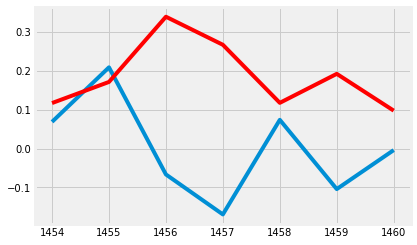

In [ ]:
from matplotlib import pyplot
pyplot.plot(test)
pyplot.plot(predictions, color='red')


# **ARIMA**

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving AAPL2.csv to AAPL2.csv


In [ ]:
df = pd.read_csv('AAPL2.csv', parse_dates=['Date'])
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-11-29,11.267858,11.338572,11.120714,11.316786,9.683158,445785200
1,2010-11-30,11.197857,11.227143,11.102500,11.112500,9.508361,501858000
2,2010-12-01,11.259643,11.348214,11.250000,11.300000,9.668793,461750800
3,2010-12-02,11.340357,11.392858,11.246072,11.362500,9.722270,462837200
4,2010-12-03,11.321786,11.380357,11.297857,11.337143,9.700573,342092800


In [ ]:
df=df.drop(['Open', 'High', 'Low', 'Adj Close','Volume'], axis=1)
df.head()

,Date,Close
0,2010-11-29,11.316786
1,2010-11-30,11.112500
2,2010-12-01,11.300000
3,2010-12-02,11.362500
4,2010-12-03,11.337143


In [ ]:
monthly_df = df.resample('M', on='Date').mean()
monthly_df.head()

,Close
Date,
2010-11-30,11.214643
2010-12-31,11.481640
2011-01-31,12.085000
2011-02-28,12.542237
2011-03-31,12.410388


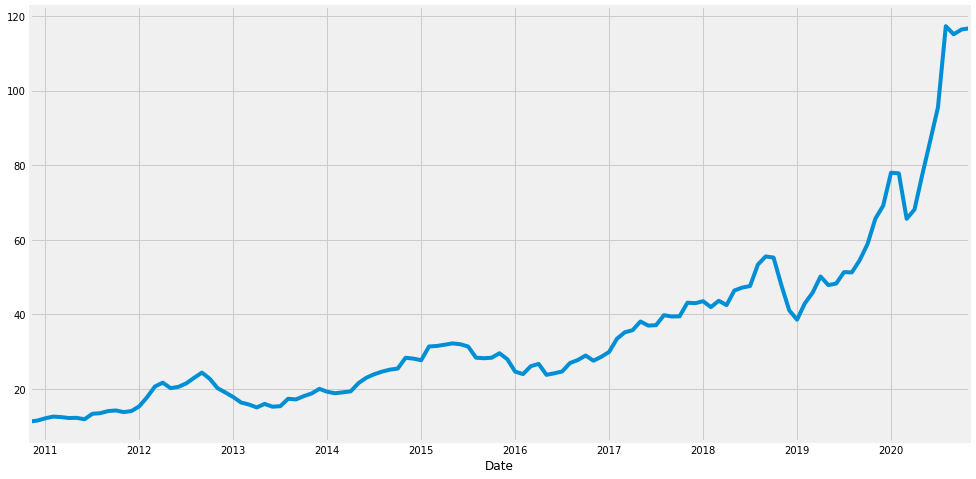

In [ ]:
monthly_df['Close'].plot(figsize=(15, 8))

### Autocorrelation Plot
Trend is Polynomial.
D =2

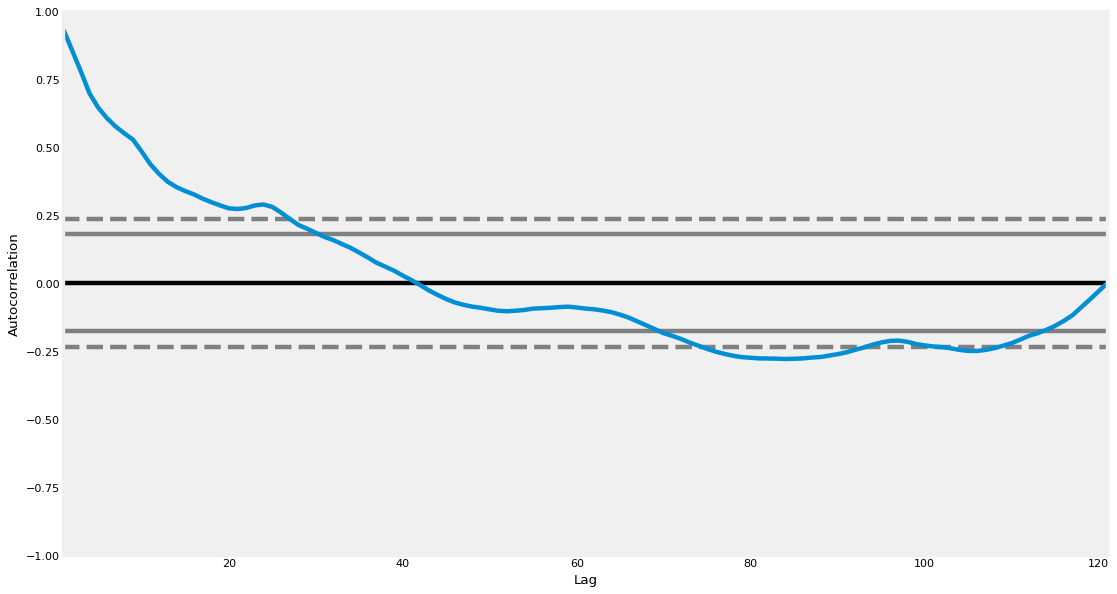

In [ ]:
from pandas.plotting import autocorrelation_plot
from matplotlib.pyplot import figure
figure(num=None, figsize=(15, 9), dpi=80, facecolor='w', edgecolor='k')
autocorrelation_plot(monthly_df['Close'])

q = 5

### Partial Autocorrelation Graph

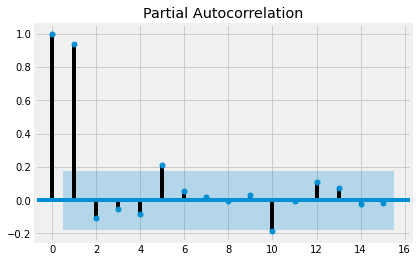

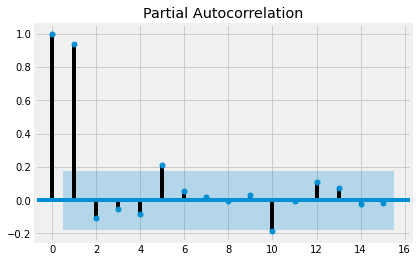

In [ ]:
from statsmodels.graphics.tsaplots import plot_pacf
plot_pacf(monthly_df['Close'], lags=15)

p = 1

In [ ]:
from statsmodels.tsa.arima_model import ARIMA
model = ARIMA(monthly_df['Close'], order=(5,2,1))
model_fit = model.fit()
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:               D2.Close   No. Observations:                  119
Model:                 ARIMA(5, 2, 1)   Log Likelihood                -297.673
Method:                       css-mle   S.D. of innovations              2.916
Date:                Fri, 27 Nov 2020   AIC                            611.347
Time:                        20:37:48   BIC                            633.580
Sample:                    01-31-2011   HQIC                           620.375
                         - 11-30-2020                                         
==================================================================================
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.0481      0.045      1.079      0.283      -0.039       0.135
ar.L1.D2.Close    -0.1161      0.128     -0.908      0.366      -0.367       0.135
ar.L2.D2.Close    -0.2704      0.094     -2.867      0.005      -0.455      -0.086
ar.L3.D2.Close    -0.2852      0.109     -2.612      0.010      -0.499      -0.071
ar.L4.D2.Close    -0.2560      0.100     -2.556      0.012      -0.452      -0.060
ar.L5.D2.Close    -0.5036      0.114     -4.424      0.000      -0.727      -0.281
ma.L1.D2.Close    -0.6084      0.131     -4.656      0.000      -0.865      -0.352
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            0.7418           -0.7866j            1.0812           -0.1297
AR.2            0.7418           +0.7866j            1.0812            0.1297
AR.3           -1.2083           -0.0000j            1.2083           -0.5000
AR.4           -0.3918           -1.1189j            1.1856           -0.3036
AR.5           -0.3918           +1.1189j            1.1856            0.3036
MA.1            1.6437           +0.0000j            1.6437            0.0000
-----------------------------------------------------------------------------
"""

In [ ]:
residuals = model_fit.resid

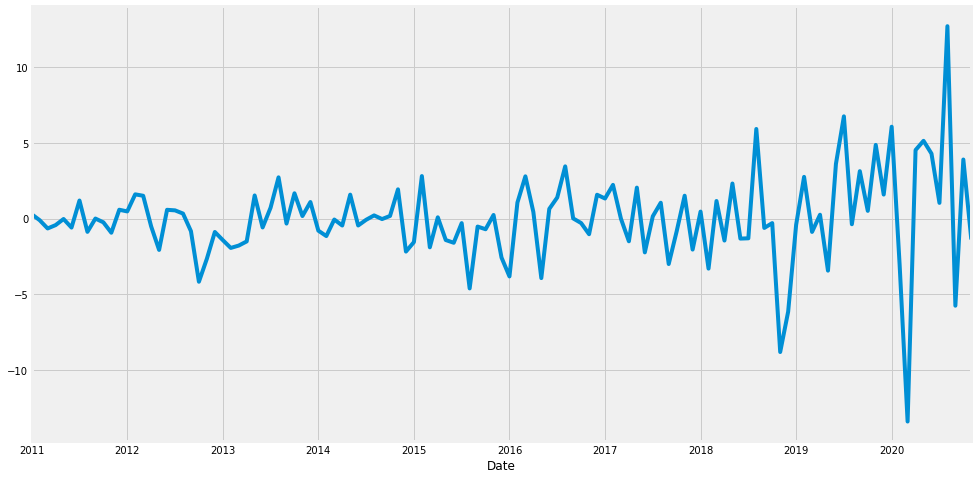

In [ ]:
residuals.plot(figsize=(15, 8))

In [ ]:
residuals.describe()

count    119.000000
mean      -0.007322
std        2.928447
min      -13.392926
25%       -1.310628
50%       -0.062223
75%        1.259006
max       12.697526
dtype: float64

### Variations
* **ARIMA** - <br />
    model = ARIMA(df['Sales'], order=(p,d,q)) <br />
* **Autoregression** - <br />
    model = ARIMA(df['Sales'], order=(p,d,0)) <br />
* **Moving Avaerage Model** - <br />
    model = ARIMA(df['Sales'], order=(0,d,q)) <br />

In [ ]:
output = model_fit.forecast()
output

(array([120.65799154]),
 array([2.91553165]),
 array([[114.94365451, 126.37232857]]))

In [ ]:
model_fit.forecast(5)[0]

array([120.65799154, 123.33891851, 136.73496964, 146.81552075,
       154.42519064])

## Walkforward 

In [ ]:
train_size = int(monthly_df.shape[0]*0.7)

In [ ]:
train, test = monthly_df.Close[0:train_size], monthly_df.Close[train_size:]

In [ ]:
test.shape

(37,)

In [ ]:
data = train
predict =[]
for t in test:
    model = ARIMA(data, order=(5,1,0))
    model_fit = model.fit()
    y = model_fit.forecast()
    print(y[0][0])
    predict.append(y[0][0])
    data = np.append(data, t)
    data = pd.Series(data)

39.613733014948735
44.214339235476075
43.217865533435074
44.22836789222373
41.713772417600104
44.9928966631535
42.38272105893665
47.021422660481676
47.51966820843053
47.89011125515231
54.23573130249865
56.722013644668856
55.96610956503858
46.98590193951871
40.25533774844246
39.31327203050195
46.80581129122195
46.82634293556947
50.870105313540286
46.01135559229459
47.770354575064616
53.10355836871724
51.82763110599128
54.8747755297045
60.09968068207283
68.06230726258855
69.78428373993756
81.48362965041292
78.53007459080781
59.374781494421924
69.58543380114078
80.9318629401129
88.43703404466973
94.87153833566026
129.11511585897642
108.59858670282499
115.38610526804386


In [ ]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(test.values, predict)
mse

41.13656035661165

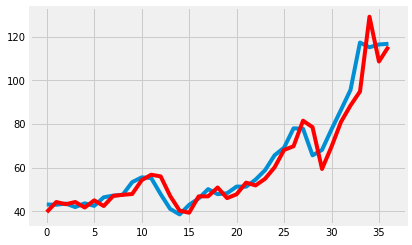

In [ ]:
from matplotlib import pyplot
pyplot.plot(test.values)
pyplot.plot(predict, color='red')


#**SARIMA**

SARIMA(p,d,q)(P,D,Q)m

* p: Trend autoregression order.
* d: Trend difference order.
* q: Trend moving average order.

**Seasonal Elements** -   
There are four seasonal elements that are not part of ARIMA that must be configured; they are:  

* P: Seasonal autoregressive order.
* D: Seasonal difference order.
* Q: Seasonal moving average order.
* m: The number of time steps for a single seasonal period.

In [ ]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [ ]:
df = pd.read_csv('AAPL2.csv', parse_dates=['Date'])
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-11-29,11.267858,11.338572,11.120714,11.316786,9.683158,445785200
1,2010-11-30,11.197857,11.227143,11.102500,11.112500,9.508361,501858000
2,2010-12-01,11.259643,11.348214,11.250000,11.300000,9.668793,461750800
3,2010-12-02,11.340357,11.392858,11.246072,11.362500,9.722270,462837200
4,2010-12-03,11.321786,11.380357,11.297857,11.337143,9.700573,342092800


In [ ]:
df=df.drop(['Open', 'High', 'Low', 'Adj Close','Volume'], axis=1)
df.head()

,Date,Close
0,2010-11-29,11.316786
1,2010-11-30,11.112500
2,2010-12-01,11.300000
3,2010-12-02,11.362500
4,2010-12-03,11.337143


In [ ]:
monthly_df = df.resample('M', on='Date').mean()
monthly_df.head()

,Close
Date,
2010-11-30,11.214643
2010-12-31,11.481640
2011-01-31,12.085000
2011-02-28,12.542237
2011-03-31,12.410388


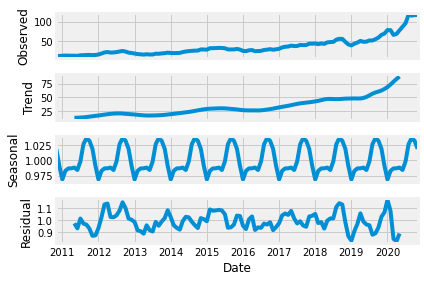

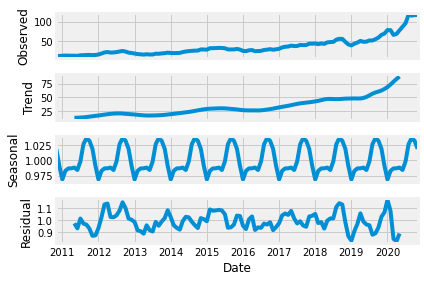

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose

result_a = seasonal_decompose(monthly_df['Close'], model='multiplicative')
result_a.plot()

In [ ]:
model = SARIMAX(monthly_df['Close'], order=(5,1,3), seasonal_order=(1,1,1,12))

In [ ]:
model_fit = model.fit()

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/statespace/sarimax.py:981: UserWarning: Non-stationary starting seasonal autoregressive Using zeros as starting parameters.
  warn('Non-stationary starting seasonal autoregressive'
/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


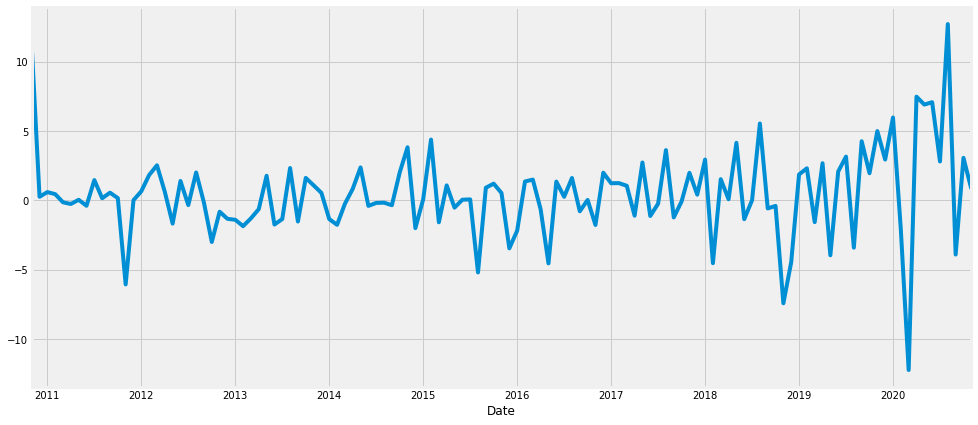

In [ ]:
residuals = model_fit.resid
residuals.plot(figsize=(15,7))

In [ ]:
output = model_fit.forecast()
output

2020-12-31    111.820814
Freq: M, dtype: float64

In [ ]:
model_fit.forecast(12)

2020-12-31    111.820814
2021-01-31    106.913794
2021-02-28    113.784692
2021-03-31    115.071322
2021-04-30    113.322998
2021-05-31    116.497119
2021-06-30    120.026148
2021-07-31    118.101568
2021-08-31    122.062278
2021-09-30    127.609224
2021-10-31    126.829373
2021-11-30    127.353623
Freq: M, dtype: float64

In [ ]:
yhat = model_fit.predict()
yhat.head()

Date
2010-11-30     0.000000
2010-12-31    11.214680
2011-01-31    11.481632
2011-02-28    12.085017
2011-03-31    12.542227
Freq: M, dtype: float64

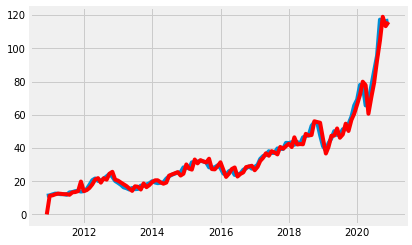

In [ ]:
pyplot.plot(monthly_df['Close'])
pyplot.plot(yhat, color='red')